In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns;
sns.set()

### Introducing PCA
###### PCA is  a fast and flexible unsupervised method for dimetionality reduction in data.

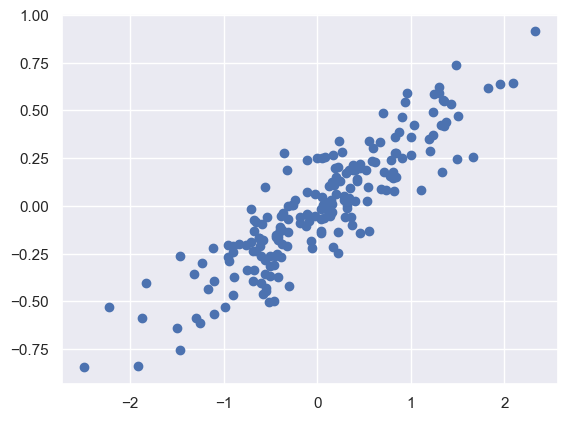

In [3]:
rng=np.random.RandomState(1)
X=np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1]);

In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


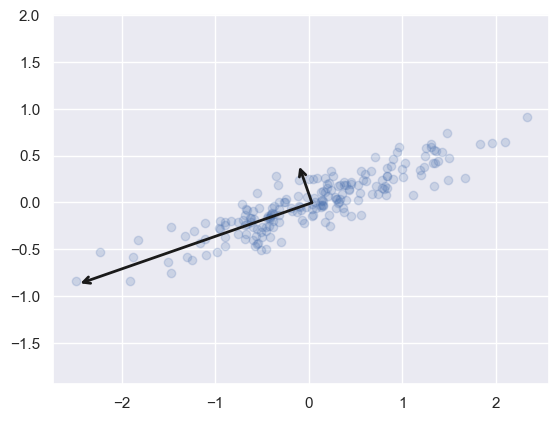

In [7]:
#visualize components and the explained variance
def draw_vector(v0,v1, ax=None):
    ax=ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0, color='k')
    ax.annotate('',v1,v0, arrowprops=arrowprops)
    
    #plot data
plt.scatter(X[:,0],X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_,pca.components_):
    v=vector*3*np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
plt.axis('equal');

#### PCA as dimensionality reduction

In [8]:
pca=PCA(n_components=1)
pca.fit(X)
X_pca=pca.transform(X)
print('original shape: ',X.shape)
print('transformed shape: ',X_pca.shape)
#clearly you can see the data is reduced to a single dimension

original shape:  (200, 2)
transformed shape:  (200, 1)


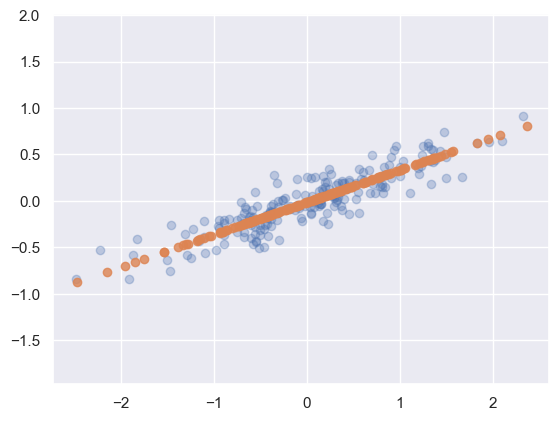

In [9]:
#perform the inverse transform of the reduced data and plot it along the original data
X_new=pca.inverse_transform(X_pca)
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(X_new[:,0],X_new[:,1], alpha=0.8)
plt.axis('equal');

#### PCA for visualization: Handwritten digits

In [10]:
from sklearn.datasets import load_digits
digits=load_digits()
digits.data.shape

(1797, 64)

In [11]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
pca=PCA(2)#project form 64 to 2 dimensions
projected=pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


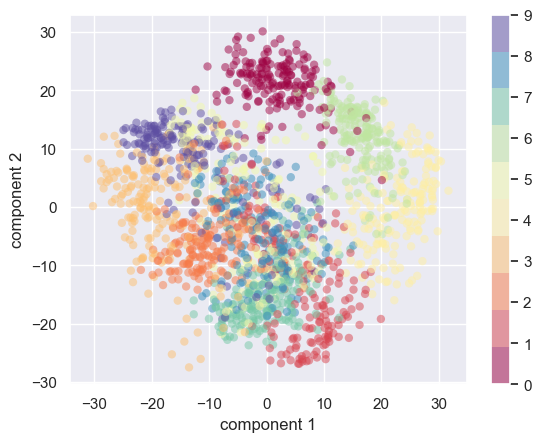

In [13]:
#plot the first 2 principal components of each point
plt.scatter(projected[:,0],projected[:,1],
           c=digits.target, edgecolor='none', alpha=0.5,
           cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

##### choosing the number of components

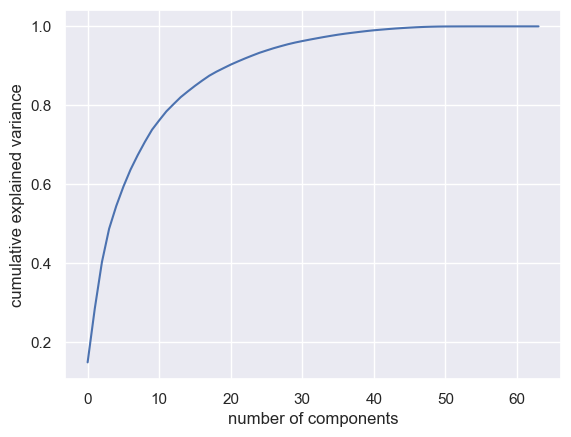

In [14]:
pca=PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### PCA as Noise Filtering

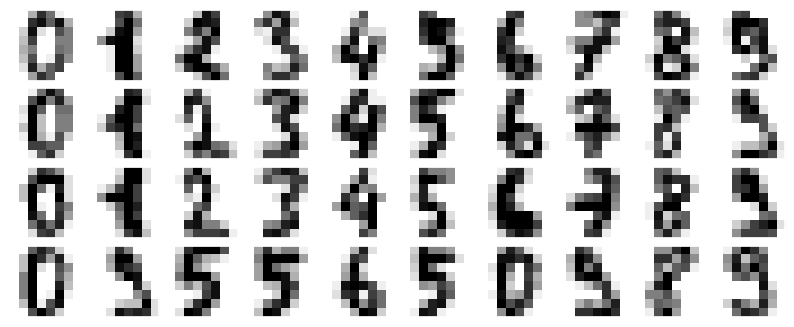

In [15]:
def plot_digits(data):
    fig, axes=plt.subplots(4,10, figsize=(10,4),
                          subplot_kw={'xticks':[],'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),
                 cmap='binary', interpolation='nearest',
                 clim=(0,16))
plot_digits(digits.data)
#noise-free digits

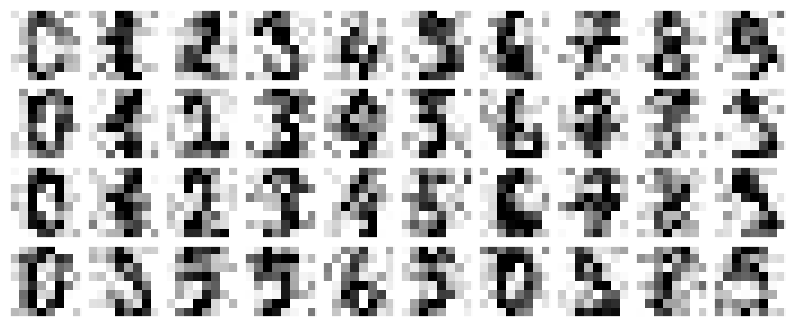

In [16]:
#create some random noise
np.random.seed(42)
noisy=np.random.normal(digits.data,4)
plot_digits(noisy)
#digits with gaussian noise added

In [17]:
pca=PCA(0.50).fit(noisy)
pca.n_components_

12

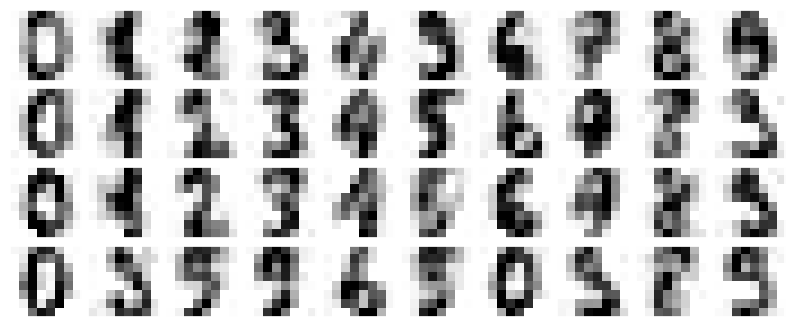

In [18]:
components=pca.transform(noisy)
filtered=pca.inverse_transform(components)
plot_digits(filtered)

##### Example: Eigenfaces


In [19]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
pca=RandomizedPCA(150)
pca.fit(faces.data)

In [ ]:
fig, axes=plt.subplots(3,8, figsize=(9,4),
                      subplot_kw={'xticks':[],'yticks':[]},
                                 gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62,47),cmap='bone')

In [ ]:
#look at the cumulative variance of these components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
#compare the input images with these 150 reconstructed image components

#compute the components and projected faces
pca=RandomizedPCA(150).fit(faces.data)
components=pca.transform(faces.data)
projected=pca.inverse_transform(components)

#plot the results 
fig,ax=plt.subplots(2,10, figsize=(10,3),
                   subplot_kw={'xticks':[],'yticks':[]},
                              gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i in range(10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
    ax[1,i].imshow(faces.data[i].reshape(62,47),cmap='binary_r')
    
ax[0,0].set_ylabel('full-dim\ninput')
ax[1,0].set_ylabel('150-dim\nreconstruction');